# Exploratory Data Analysis — Indian Food Dataset
This Colab notebook performs EDA on the provided `indian_food.csv`. The notebook keeps the same number of cells (52) as your sample notebook and contains code cells and markdown explanations. Run cells in order.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [6]:
df = pd.read_csv("indian_food.csv")
df.shape

(255, 9)

In [7]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,255,255,Balu shahi,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients,255,252,"Gram flour, ghee, sugar",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diet,255,2,vegetarian,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prep_time,255.0,NaN,NaN,NaN,31.105882,72.554409,-1.0,10.0,10.0,20.0,500.0
cook_time,255.0,NaN,NaN,NaN,34.529412,48.26565,-1.0,20.0,30.0,40.0,720.0
flavor_profile,255,5,spicy,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course,255,4,main course,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,255,25,Gujarat,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,254,7,West,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data quality checks
We check duplicates, missing values, and basic sanity of columns.

In [10]:
dups = df.duplicated().sum()
dups

np.int64(0)

### Missing values
We will inspect missing values per column.

In [11]:
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


### Column overview
Columns in the dataset: `name`, `ingredients`, `diet`, `prep_time`, `cook_time`, `flavor_profile`, `course`, `state`, `region`.

In [12]:
df['diet'].value_counts(dropna=False)

,count
diet,
vegetarian,226
non vegetarian,29


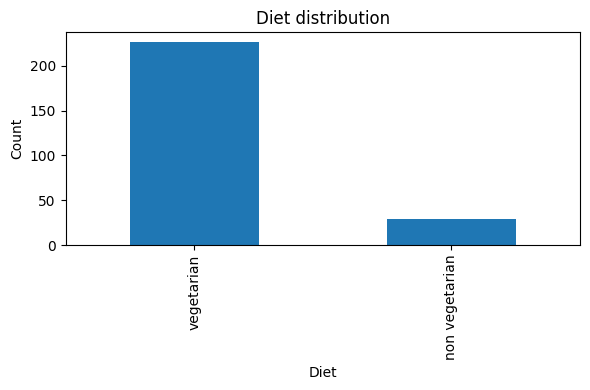

In [13]:
plt.figure(figsize=(6,4))
df['diet'].value_counts().plot(kind='bar')
plt.title('Diet distribution')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.tight_layout()

In [14]:
df['course'].value_counts().head(20)

,count
course,
main course,129
dessert,85
snack,39
starter,2


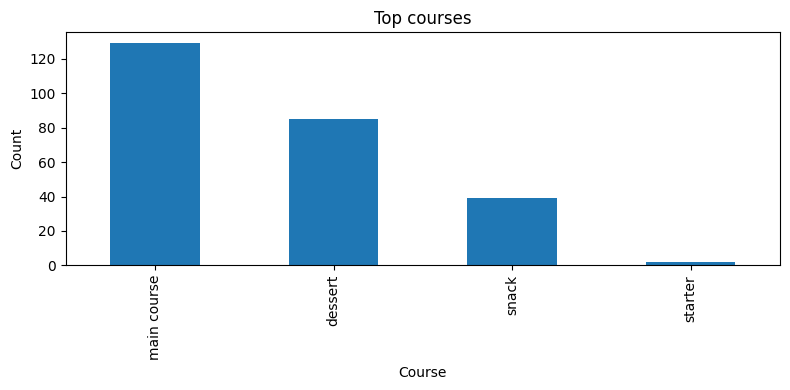

In [15]:
plt.figure(figsize=(8,4))
df['course'].value_counts().head(15).plot(kind='bar')
plt.title('Top courses')
plt.xlabel('Course')
plt.ylabel('Count')
plt.tight_layout()

In [16]:
df['region'].value_counts().head(20)

,count
region,
West,74
South,59
North,49
East,31
North East,25
-1,13
Central,3


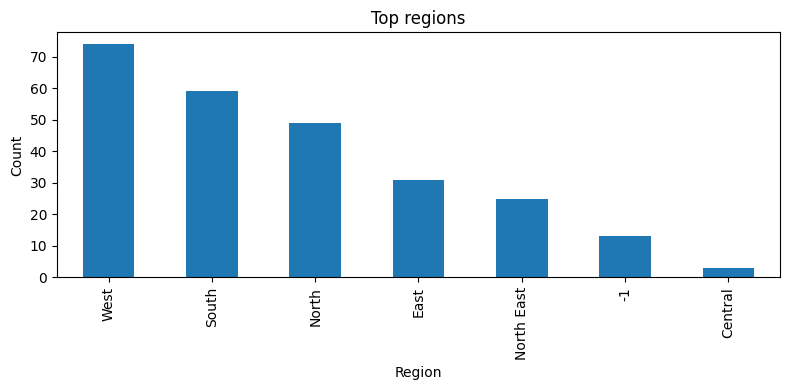

In [17]:
plt.figure(figsize=(8,4))
df['region'].value_counts().head(15).plot(kind='bar')
plt.title('Top regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()

In [18]:
df['state'].value_counts().head(20)

,count
state,
Gujarat,35
Punjab,32
Maharashtra,30
-1,24
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


## Ingredients analysis
We'll tokenize the `ingredients` column to find the most common ingredients across recipes.

In [19]:
import re
from collections import Counter

def tokenize_ingredients(text):
    if pd.isna(text):
        return []
    text = re.sub(r"\([^\)]*\)", "", text)
    tokens = re.split('[,;]', text)
    out = []
    for t in tokens:
        for w in re.split('\s+', t):
            w = re.sub('[^A-Za-z&+-]', '', w).strip().lower()
            if len(w) > 1:
                out.append(w)
    return out

all_tokens = Counter()
for val in df['ingredients'].dropna():
    all_tokens.update(tokenize_ingredients(val))

all_tokens.most_common(30)

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1200938918.py:11: SyntaxWarning: invalid escape sequence '\s'
  for w in re.split('\s+', t):


[('flour', 102),
 ('dal', 60),
 ('sugar', 54),
 ('rice', 53),
 ('masala', 48),
 ('oil', 40),
 ('garam', 40),
 ('coconut', 39),
 ('green', 38),
 ('milk', 37),
 ('powder', 35),
 ('seeds', 35),
 ('ginger', 31),
 ('leaves', 30),
 ('urad', 29),
 ('mustard', 28),
 ('wheat', 26),
 ('curry', 26),
 ('ghee', 25),
 ('jaggery', 22),
 ('gram', 21),
 ('sesame', 21),
 ('chana', 19),
 ('tomato', 18),
 ('whole', 18),
 ('butter', 16),
 ('red', 16),
 ('lemon', 14),
 ('cardamom', 13),
 ('potato', 13)]

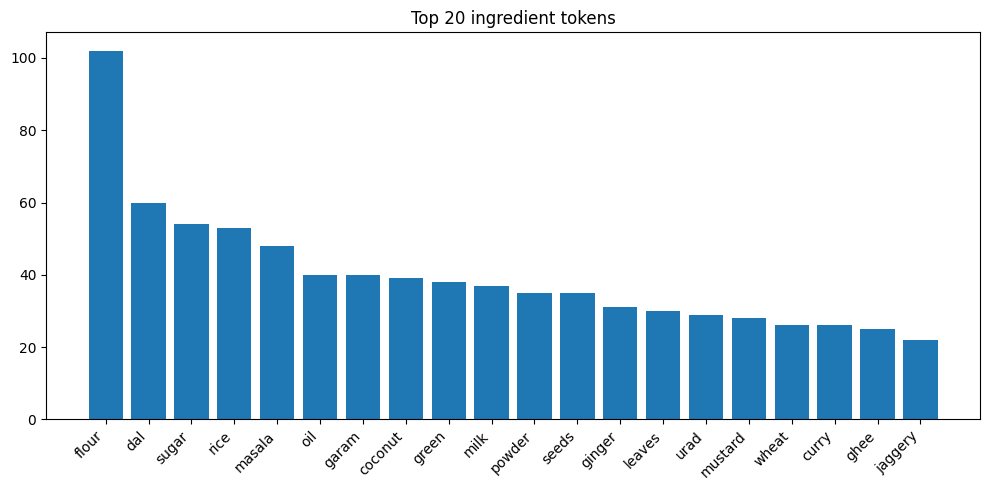

In [20]:
top_ing = all_tokens.most_common(20)
names = [x[0] for x in top_ing]
counts = [x[1] for x in top_ing]
plt.figure(figsize=(10,5))
plt.bar(range(len(names)), counts)
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.title('Top 20 ingredient tokens')
plt.tight_layout()

### Prep and Cook time
The `prep_time` and `cook_time` columns may contain textual time; we'll attempt to extract minutes as integers where possible.

In [21]:
import re

def parse_minutes(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    nums = re.findall(r'\d+', s)
    if not nums:
        return np.nan
    nums = [int(n) for n in nums]
    return max(nums)

df['prep_mins'] = df['prep_time'].apply(parse_minutes)
df['cook_mins'] = df['cook_time'].apply(parse_minutes)
df[['prep_time','prep_mins','cook_time','cook_mins']].head()

,prep_time,prep_mins,cook_time,cook_mins
0,45,45,25,25
1,80,80,30,30
2,15,15,60,60
3,15,15,30,30
4,15,15,40,40


In [22]:
df[['prep_mins','cook_mins']].describe()

,prep_mins,cook_mins
count,255.000000,255.000000
mean,31.341176,34.749020
std,72.452681,48.107161
min,1.000000,1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


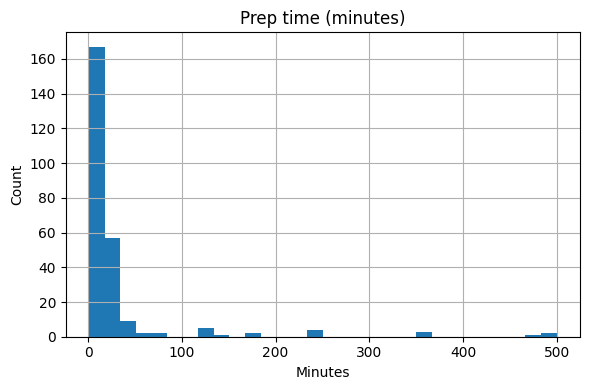

In [23]:
plt.figure(figsize=(6,4))
df['prep_mins'].dropna().astype(float).hist(bins=30)
plt.title('Prep time (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.tight_layout()

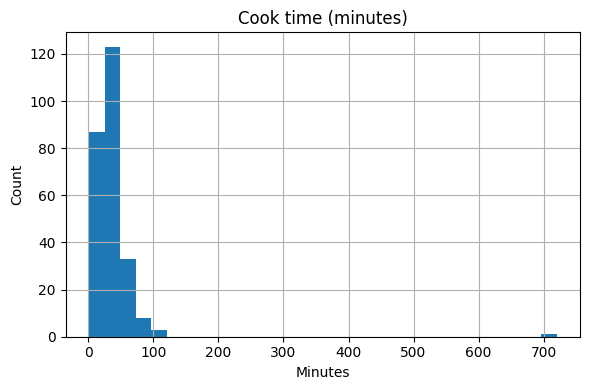

In [24]:
plt.figure(figsize=(6,4))
df['cook_mins'].dropna().astype(float).hist(bins=30)
plt.title('Cook time (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.tight_layout()

In [25]:
df['total_mins'] = df[['prep_mins','cook_mins']].sum(axis=1)
df['total_mins'].describe()

,total_mins
count,255.000000
mean,66.090196
std,92.437996
min,2.000000
25%,30.000000
50%,50.000000
75%,60.000000
max,730.000000


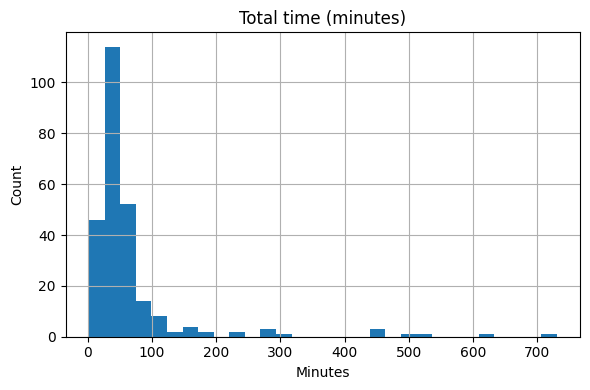

In [26]:
plt.figure(figsize=(6,4))
df['total_mins'].dropna().hist(bins=30)
plt.title('Total time (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.tight_layout()

In [27]:
df['flavor_profile'].value_counts().head(20)

,count
flavor_profile,
spicy,133
sweet,88
-1,29
bitter,4
sour,1


In [28]:
df['state'].value_counts().head(20)

,count
state,
Gujarat,35
Punjab,32
Maharashtra,30
-1,24
West Bengal,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


In [29]:
pd.crosstab(df['diet'], df['course'])

course,dessert,main course,snack,starter
diet,,,,
non vegetarian,0,27,0,2
vegetarian,85,102,39,0


In [30]:
df.groupby('course')['total_mins'].median().sort_values(ascending=False).head(20)

,total_mins
course,
starter,217.5
dessert,50.0
snack,50.0
main course,45.0


### Correlations
We can check simple relationships between numeric fields (prep/cook/total minutes).

In [31]:
df[['prep_mins','cook_mins','total_mins']].corr()

,prep_mins,cook_mins,total_mins
prep_mins,1.000000,0.140740,0.857042
cook_mins,0.140740,1.000000,0.630738
total_mins,0.857042,0.630738,1.000000


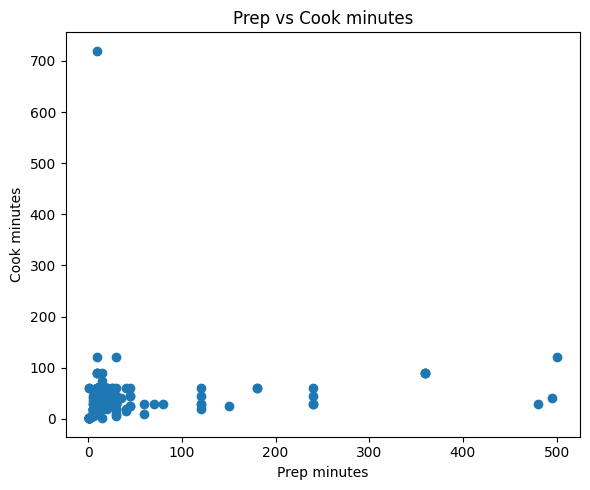

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(df['prep_mins'], df['cook_mins'])
plt.xlabel('Prep minutes')
plt.ylabel('Cook minutes')
plt.title('Prep vs Cook minutes')
plt.tight_layout()

/tmp/ipython-input-1790929001.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_regions)


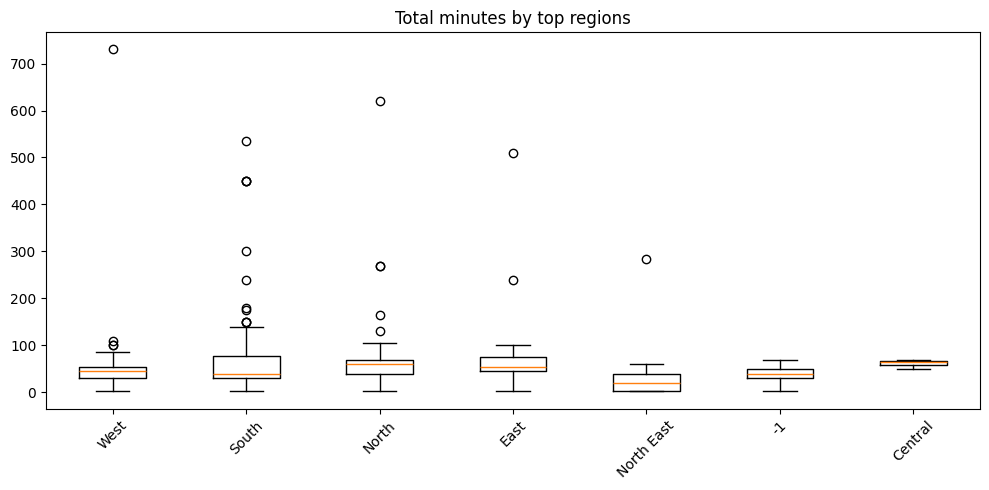

In [33]:
# Boxplot of total minutes per region (top 8 regions)
top_regions = df['region'].value_counts().head(8).index
data = [df.loc[df['region']==r,'total_mins'].dropna() for r in top_regions]
plt.figure(figsize=(10,5))
plt.boxplot(data, labels=top_regions)
plt.xticks(rotation=45)
plt.title('Total minutes by top regions')
plt.tight_layout()

### Ingredient co-occurrence (simple view)
We calculate how often top ingredients appear together across recipes (small matrix for top 10 tokens).

In [34]:
top10 = [t for t,c in all_tokens.most_common(10)]
co = pd.DataFrame(0, index=top10, columns=top10)
for ing in df['ingredients'].dropna():
    toks = set(tokenize_ingredients(ing))
    for a in top10:
        for b in top10:
            if a in toks and b in toks:
                co.loc[a,b] += 1
co

,flour,dal,sugar,rice,masala,oil,garam,coconut,green,milk
flour,84,8,18,22,10,9,8,12,10,8
dal,8,40,2,6,6,3,5,6,6,0
sugar,18,2,54,9,0,1,0,5,3,19
rice,22,6,9,51,3,6,2,9,4,6
masala,10,6,0,3,48,8,40,4,10,1
oil,9,3,1,6,8,40,6,8,6,0
garam,8,5,0,2,40,6,40,3,7,1
coconut,12,6,5,9,4,8,3,37,6,7
green,10,6,3,4,10,6,7,6,35,3
milk,8,0,19,6,1,0,1,7,3,35


We'll display the co-occurrence as a simple table.

In [35]:
co

,flour,dal,sugar,rice,masala,oil,garam,coconut,green,milk
flour,84,8,18,22,10,9,8,12,10,8
dal,8,40,2,6,6,3,5,6,6,0
sugar,18,2,54,9,0,1,0,5,3,19
rice,22,6,9,51,3,6,2,9,4,6
masala,10,6,0,3,48,8,40,4,10,1
oil,9,3,1,6,8,40,6,8,6,0
garam,8,5,0,2,40,6,40,3,7,1
coconut,12,6,5,9,4,8,3,37,6,7
green,10,6,3,4,10,6,7,6,35,3
milk,8,0,19,6,1,0,1,7,3,35


### Longest recipes
Show top 10 recipes by total time.

In [36]:
df.sort_values('total_mins', ascending=False)[['name','prep_time','cook_time','total_mins','region']].head(10)

,name,prep_time,cook_time,total_mins,region
62,Shrikhand,10,720,730,West
114,Pindi chana,500,120,620,North
155,Puttu,495,40,535,South
29,Misti doi,480,30,510,East
130,Idli,360,90,450,South
128,Dosa,360,90,450,South
144,Masala Dosa,360,90,450,South
48,Poornalu,240,60,300,South
66,Chak Hao Kheer,240,45,285,North East
123,Tandoori Fish Tikka,240,30,270,North


### Quick recipes
Top 10 shortest by total time (excluding missing total time).

In [37]:
df[df['total_mins'].notna()].sort_values('total_mins').head(10)[['name','prep_time','cook_time','total_mins','region']]

,name,prep_time,cook_time,total_mins,region
65,Pork Bharta,-1,-1,2,North East
241,Koldil Duck,-1,-1,2,North East
244,Pakhala,-1,-1,2,East
213,Mag Dhokli,-1,-1,2,West
246,Payokh,-1,-1,2,North East
216,Farsi Puri,-1,-1,2,West
223,Kumol Sawul,-1,-1,2,North East
220,Cheera Doi,-1,-1,2,East
240,Konir Dom,-1,-1,2,North East
239,Koldil Chicken,-1,-1,2,North East


## Notes and next steps
- Consider normalizing `course` and `flavor_profile` labels
- Clean `ingredients` with more advanced NLP (lemmatization)
- Enrich dataset with nutritional info or tags


### Reproducibility
This notebook uses only standard Python libraries (pandas, numpy, matplotlib). You can run it in Google Colab by uploading the original `indian_food.csv` to `/mnt/data/` or by changing the path to the file.

In [39]:
import sys
import platform
print('python', sys.version)
print('platform', platform.platform())

python 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
platform Linux-6.1.123+-x86_64-with-glibc2.35


In [40]:
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,prep_mins,cook_mins,total_mins
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,45,25,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,80,30,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,15,60,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,15,30,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,15,40,55
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,10,50,60
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,10,50,60
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1,10,20,30
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East,20,30,50
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1,10,40,50


**Acknowledgements**: EDA generated automatically based on the uploaded dataset. If you'd like additional plots, feature engineering, or modelling, tell me what to prioritize.

End of notebook.